In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
%matplotlib inline
%pip install seaborn
%pip install plotly
%pip install scipy
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
s=pd.read_csv('../Downloads/Levels_Fyi_Salary_Data.csv')
print(s)

                timestamp     company     level                         title  \
0       6/7/2017 11:33:27      Oracle        L3               Product Manager   
1      6/10/2017 17:11:29        eBay      SE 2             Software Engineer   
2      6/11/2017 14:53:57      Amazon        L7               Product Manager   
3       6/17/2017 0:23:14       Apple        M1  Software Engineering Manager   
4      6/20/2017 10:58:51   Microsoft        60             Software Engineer   
...                   ...         ...       ...                           ...   
62637   9/9/2018 11:52:32      Google        T4             Software Engineer   
62638   9/13/2018 8:23:32   Microsoft        62             Software Engineer   
62639  9/13/2018 14:35:59        MSFT        63             Software Engineer   
62640  9/16/2018 16:10:35  Salesforce  Lead MTS             Software Engineer   
62641   1/29/2019 5:12:59       apple      ict3             Software Engineer   

       totalyearlycompensat

In [3]:
sdf = pd.read_csv("Levels_Fyi_Salary_Data.csv")


# New Section

In [4]:
#data summary 
sdf.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
sdf.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [52]:
#sdf = sdf(("timestamp","company","title","location","yearsofexperience", "basesalary"))
#sdf = sdf.rename(columns = {'yearsofexperience' : 'salary'})# , axis=1)
sdf.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,660,5.0,5.0,Distributed Systems (Back-End),210000.0,...,1,0,0,1,0,0,0,0,Asian,PhD
23532,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,553,3.0,2.0,DevOps,124000.0,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,593,6.0,6.0,Full Stack,177000.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,620,4.0,4.0,API Development (Back-End),164000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,596,5.0,0.0,Full Stack,165000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree


In [53]:
sdf = sdf[sdf["basesalary"].notnull()]
sdf.head()


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,660,5.0,5.0,Distributed Systems (Back-End),210000.0,...,1,0,0,1,0,0,0,0,Asian,PhD
23532,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,553,3.0,2.0,DevOps,124000.0,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,593,6.0,6.0,Full Stack,177000.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,620,4.0,4.0,API Development (Back-End),164000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,596,5.0,0.0,Full Stack,165000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree


In [54]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21146 entries, 15710 to 61984
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                21146 non-null  object 
 1   company                  21146 non-null  object 
 2   level                    21146 non-null  object 
 3   title                    21146 non-null  object 
 4   totalyearlycompensation  21146 non-null  int64  
 5   location                 21146 non-null  int32  
 6   yearsofexperience        21146 non-null  float64
 7   yearsatcompany           21146 non-null  float64
 8   tag                      21146 non-null  object 
 9   basesalary               21146 non-null  float64
 10  stockgrantvalue          21146 non-null  float64
 11  bonus                    21146 non-null  float64
 12  gender                   21146 non-null  object 
 13  otherdetails             21146 non-null  object 
 14  cityid            

In [55]:
#cleaning the data
sdf = sdf.dropna()
sdf.isnull().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
dtype: int64

In [56]:
#User with 'data' in the title
#sdf = sdf[sdf["title"] == "Data"]
#sdf = sdf.drop("title", axis=1)
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21146 entries, 15710 to 61984
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                21146 non-null  object 
 1   company                  21146 non-null  object 
 2   level                    21146 non-null  object 
 3   title                    21146 non-null  object 
 4   totalyearlycompensation  21146 non-null  int64  
 5   location                 21146 non-null  int32  
 6   yearsofexperience        21146 non-null  float64
 7   yearsatcompany           21146 non-null  float64
 8   tag                      21146 non-null  object 
 9   basesalary               21146 non-null  float64
 10  stockgrantvalue          21146 non-null  float64
 11  bonus                    21146 non-null  float64
 12  gender                   21146 non-null  object 
 13  otherdetails             21146 non-null  object 
 14  cityid            

In [57]:
#
sdf['location'].value_counts()

620    2484
596    1694
471    1556
553     747
42      627
       ... 
649       1
5         1
359       1
547       1
517       1
Name: location, Length: 767, dtype: int64

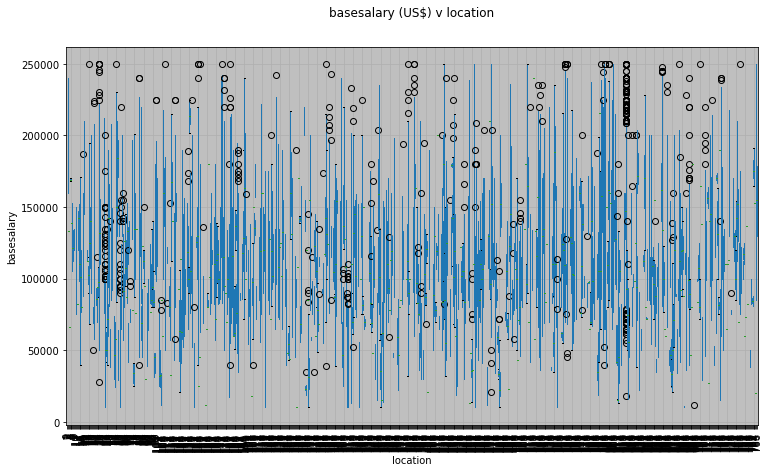

In [58]:
#Inspecting the salary range by Boxplot
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sdf.boxplot('basesalary', 'location', ax=ax)
plt.suptitle('basesalary (US$) v location')
plt.title('')
plt.ylabel('basesalary')
plt.xticks(rotation=90)
plt.show()


In [59]:
sdf = sdf[sdf["basesalary"] <= 250000]
sdf = sdf[sdf["basesalary"] >= 10000]
sdf = sdf[sdf['location'] != 'Other']

In [60]:
'''
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sdf.boxplot('salary', 'country', ax=ax)
plt.suptitle('salary (US$) v country')
plt.title('')
plt.ylabel('salary')
plt.xticks(rotation=90)
plt.show()
'''


"\nfig, ax = plt.subplots(1,1, figsize=(12, 7))\nsdf.boxplot('salary', 'country', ax=ax)\nplt.suptitle('salary (US$) v country')\nplt.title('')\nplt.ylabel('salary')\nplt.xticks(rotation=90)\nplt.show()\n"

In [61]:
sdf["basesalary"].unique()

array([210000., 124000., 177000., 164000., 165000., 160000., 103000.,
        78000., 130000., 140000., 150000.,  45000., 112000., 114000.,
       167000., 155000., 187000., 110000., 153000., 111000., 215000.,
       201000.,  27000., 180000.,  36000.,  53000., 170000., 250000.,
       126000., 246000., 220000., 135000.,  74000., 120000.,  90000.,
        66000., 127000.,  70000., 185000., 198000., 163000., 191000.,
        40000., 107000., 142000.,  86000., 134000., 192000.,  95000.,
       117000., 194000., 183000., 137000., 147000., 145000., 123000.,
       159000., 171000.,  73000., 178000., 228000., 148000., 144000.,
        99000.,  47000., 105000., 115000.,  17000., 129000.,  67000.,
        92000.,  55000.,  83000., 121000.,  85000., 175000., 152000.,
        84000., 200000., 119000.,  65000., 225000., 207000., 128000.,
       151000.,  77000., 106000., 143000., 182000.,  54000., 195000.,
        38000.,  23000., 122000., 100000., 162000., 174000., 156000.,
        89000., 1900

In [62]:
from sklearn.preprocessing import LabelEncoder
le_location = LabelEncoder()
sdf['location'] = le_location.fit_transform(sdf['location'])
sdf["location"].unique()


array([660, 553, 593, 620, 596, 304, 690, 708,  42, 680, 606, 418,  36,
       471, 597, 145, 452, 385, 268, 311, 453,  80, 172, 139, 503,  25,
       511, 150, 100,  55,  59, 170, 560, 378, 373, 499, 555, 392, 298,
       266, 726, 120, 243, 550, 174, 595, 683, 291, 585, 184, 430, 337,
        62, 196, 449, 181, 523, 716, 141, 535, 627, 679, 632, 303, 363,
       474, 462,  15, 178, 565, 461, 322, 190, 648, 274, 428, 714, 543,
       634, 589, 194,  52, 540, 468, 514,  30, 130, 618, 232, 524, 609,
       687, 346, 762, 318,  60, 410, 312, 527, 765, 725, 529,  13, 592,
       612, 454, 251, 666, 402,  81, 681, 223, 640, 164, 107, 111, 601,
       720, 241, 604, 463,  65, 323, 674,  41, 239, 393, 744,  85, 447,
       321,  22, 368, 544, 315, 605, 344,  82, 688, 374, 441, 562, 283,
       201, 227, 331, 623,  45, 258, 747, 728, 384, 313,  68, 446, 431,
        19, 423, 492, 121, 320, 213,  49, 574, 659, 608, 494, 525, 412,
       558,  27, 198, 180, 539, 215, 646, 260, 480, 406, 434, 28

In [63]:
print(X)

[['Seattle, Washington' 'Software Engineering Manager' '15']]


In [64]:
#d = sdf.drop("company", axis=1)
X = sdf.drop(columns=["company","title","Education","level","Race","tag","timestamp","otherdetails","gender","Masters_Degree","Bachelors_Degree","Doctorate_Degree","Highschool","Some_College",  "Race_Asian",  "Race_White",  "Race_Two_Or_More","Race_Black","Race_Hispanic"])
print(X)
y = sdf["basesalary"]
#print(y)

       totalyearlycompensation  location  yearsofexperience  yearsatcompany  \
15710                   400000       660                5.0             5.0   
23532                   136000       553                3.0             2.0   
23533                   337000       593                6.0             6.0   
23534                   222000       620                4.0             4.0   
23535                   187000       596                5.0             0.0   
...                        ...       ...                ...             ...   
61830                   241000       620                9.0             0.0   
61834                   300000       596                5.0             0.0   
61976                  1400000       385                5.0             4.0   
61979                  1470000       597               21.0             9.0   
61984                  1605000       181               16.0             2.0   

       basesalary  stockgrantvalue     bonus  cityi

In [65]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
#print(X)
#z = float(X["timestamp"].replace(":",""))
#print(z)

#new = X[np.isfinite(X).all(1)]

linear_reg.fit(X, y.values)



LinearRegression()

In [66]:
y_pred = linear_reg.predict(X)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [68]:
error

5.6954361507781826e-11

In [69]:

from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [70]:
y_pred = dec_tree_reg.predict(X)


In [71]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$0.00


In [72]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)


RandomForestRegressor(random_state=0)

In [73]:
y_pred = random_forest_reg.predict(X)

In [74]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$4.99


In [75]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [76]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$0.00


In [77]:
X

,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber
15710,400000,660,5.0,5.0,210000.0,145000.0,45000.0,7472,807.0,21208
23532,136000,553,3.0,2.0,124000.0,1000.0,11000.0,11521,819.0,32237
23533,337000,593,6.0,6.0,177000.0,125000.0,36000.0,7413,807.0,32239
23534,222000,620,4.0,4.0,164000.0,38000.0,20000.0,11527,819.0,32240
23535,187000,596,5.0,0.0,165000.0,22000.0,0.0,7419,807.0,32241
...,...,...,...,...,...,...,...,...,...,...
61830,241000,620,9.0,0.0,150000.0,46000.0,45000.0,11527,819.0,83870
61834,300000,596,5.0,0.0,180000.0,100000.0,20000.0,7419,807.0,83875
61976,1400000,385,5.0,4.0,235000.0,1165.0,0.0,7275,803.0,48059
61979,1470000,597,21.0,9.0,220000.0,1100.0,150000.0,7422,807.0,54398


In [78]:
# location,title,years of experience
X = np.array([["Seattle, Washington", "Software Engineering Manager", 15 ]])
X

array([['Seattle, Washington', 'Software Engineering Manager', '15']],
      dtype='<U28')

In [35]:
X[:, 0] = le_location.transform(X[:,0])
X[:, 1] = le_title.transform(X[:,1])
X = X.astype(float)
X


ValueError: y contains previously unseen labels: 'Seattle, Washington'

In [36]:
y_pred = regressor.predict(X)
y_pred

C:\Users\varun\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: 'Seattle, Washington'

In [37]:
#pip install pickle
import pickle

In [39]:
data = {"model": regressor, "le_location": le_country, "le_title": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

NameError: name 'le_country' is not defined

In [40]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_location"]
le_education = data["le_title"]

FileNotFoundError: [Errno 2] No such file or directory: 'saved_steps.pkl'

In [41]:
y_pred = regressor_loaded.predict(X)
y_pred

NameError: name 'regressor_loaded' is not defined

In [42]:
#checking actual data
with pd.option_context('display.max_columns', None):
    display(sdf.head(5))

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,660,5.0,5.0,Distributed Systems (Back-End),210000.0,145000.0,45000.0,Male,Asian - PhD,7472,807.0,21208,0,0,1,0,0,1,0,0,0,0,Asian,PhD
23532,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,553,3.0,2.0,DevOps,124000.0,1000.0,11000.0,Male,"Race: Two or More Races, Academic Level: Bache...",11521,819.0,32237,0,1,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,593,6.0,6.0,Full Stack,177000.0,125000.0,36000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",7413,807.0,32239,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,620,4.0,4.0,API Development (Back-End),164000.0,38000.0,20000.0,Male,"Race: Asian, Academic Level: Master’s degree",11527,819.0,32240,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,596,5.0,0.0,Full Stack,165000.0,22000.0,0.0,Male,"Race: White, Academic Level: Bachelor’s degree",7419,807.0,32241,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree


In [43]:
#checking location data
sdf.location.value_counts()

620    2484
596    1694
471    1556
553     747
42      627
       ... 
649       1
5         1
359       1
547       1
517       1
Name: location, Length: 767, dtype: int64

In [44]:
# Create a city ID so that we can use as a lookup
sdf[['city','state','country']] = sdf.location.str.split(", ",expand=True,n=2)
sdf.country.fillna('United States',inplace=True)
sdf['city_id'] = sdf.agg(lambda df: f"{df['city']}_{df['country']}",axis = 1)

sdf.head(5)

AttributeError: Can only use .str accessor with string values!

In [ ]:
#Filtering data for 'data professionals only'

sds = sdf[sdf.title.str.contains('data',case=False)] # sds: Salary for Data Science

print(sds.shape)
sds.head()

In [45]:
#Number of counts with 'data'
sds.title.value_counts()

NameError: name 'sds' is not defined

In [46]:
#Performing basic analysis on the 'data scientists' only dataset
sds.describe()

NameError: name 'sds' is not defined

In [47]:
#histogram
sds.basesalary.hist(bins=range(0,500000,50000))

NameError: name 'sds' is not defined

In [48]:
#boxplot
sds.boxplot(column = 'basesalary')

NameError: name 'sds' is not defined

In [49]:
# Checking for Alphabet/Meta new names
display(sds.loc[sds.company.str.contains('alphabet',case=False),'company'])
display(sds.loc[sds.company.str.contains('meta',case=False),'company'])

NameError: name 'sds' is not defined

In [50]:
faangless_sds = sds.copy()

faang_list = ['Facebook','Apple','Amazon','Netflix','Google','Microsoft']
faang_str = '|'.join(faang_list)

isfaang_s = sds.copy().company.str.contains(faang_str,case=False)

fds = faangless_sds = faangless_sds[isfaang_s == False]

print('Original data size  : ' , sds.shape)
print('FAANG-less data size: ' , fds.shape)
print(sds.shape[0] - fds.shape[0], 'rows removed')
print(round((fds.shape[0] / sds.shape[0])*100,1) , '% remaining')


NameError: name 'sds' is not defined

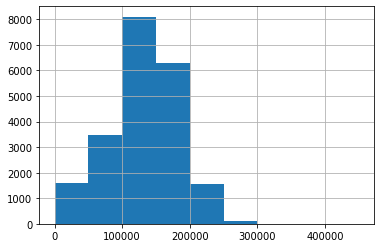

In [ ]:
sdf.basesalary.hist(bins=range(0,500000,50000))


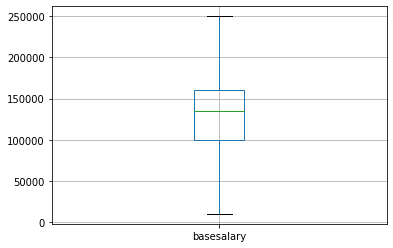

In [ ]:
sdf.boxplot(column = 'basesalary')